# Trabalho 2
Grupo 06
- Tomás Vaz de Carvalho Campinho A91668
- Miguel Ângelo Alves de Freitas A91635

## Exercício 1

1. Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido . 
    >  O grafo tem de ser ligado o que significa que entre cada par de nodos **(n1,n2)** tem de existir um caminho **n1->n2** e um caminho **n2->n1**.
    1. Gerar aleatoriamente um tal grafo com  N=32 nodos.  Cada nodo tem um número aleatório de descendentes no intervalo 1..3  cujos destinos são distintos entre si do nodo origem.
    2. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.


Importar bibliotecas necessárias:

In [ ]:
!pip install ortools

In [ ]:
import networkx as nx
import random
from ortools.linear_solver import pywraplp

#Gerar um Digrafo com orientação
Neste caso o nosso objetivo é gerar um grafo onde cada nodo vai ter vários caminhos com os outros nodos. Para além disso cada nodo tem um número aleatório de descendentes no intervalo 1..3  cujos destinos são distintos entre si do nodo origem.

Começa-se por inicializar um grafo orientado vazio, recorrendo à biblioteca networkx.

Em seguida percorremos todos os nodos e definimos o número de descedentes, daquele nodo particular, aleatoriamente no intervalo de $1$ a $D$ e geramos aleatóriamente o nodo ao qual se vai ligar. Em caso de já existir essa aresta ou os dois nodos serem iguais, geramos um nodo novo. e adicionamos ao grafo $graph$.

Gerar grafo com N nodos e 1..d descendentes:

In [ ]:
def gerar_grafo(N,d):
    grafo = nx.DiGraph()

    for x in range(1,N+1):
      descendentes = random.randint(1,d)     
      for i in range(descendentes):
        y = random.randint(1,N)
        while(x==y or grafo.has_edge(x,y)): #verificar que não gere arestas repetidas ou lacetes
          y = random.randint(1,N)

        grafo.add_edge(x,y)
    
    return grafo



##Ser fortemente ligado.
Um vértice de um grafo é **fortemente ligado** a outro se um está ao alcance do outro e vice-versa.  Em outras palavras, um vértice s é fortemente ligado a um vértice t se existe um caminho de s a t e também um caminho de t a s.  (Os dois caminhos são independentes e portanto podem ter vértices e até arcos em comum.)

Um grafo é fortemente conexo (= strongly connected) se cada um de seus vértices está fortemente ligado a cada um dos demais.

Para termos a certeza que o grafo é fortemente ligado usamos uma função de nx que vai garantir que esta condição vai existir

Imprimir grafo orientado ligado com **32** Nodos e **1** a **3** descendentes:

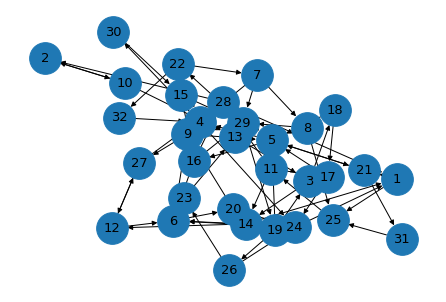

In [ ]:
N = 32 #nodos
d = 3 #1..d descendentes

grafo = gerar_grafo(N,d)

while(not nx.is_strongly_connected(grafo)): #verificar que o grafo seja orientado ligado
  grafo = gerar_grafo(N,d)

layout = nx.spring_layout(grafo)
nx.draw(grafo, layout, font_size=13, with_labels=True, node_size=1003)

##Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

Assuma que dado um grafo $(V,E)$ e os nodos $s$ e $t$, $A$ é o conjunto de todos os caminhos (sem ciclos) entre $s$ e $t$, onde cada caminho é representado pelo conjunto dos arcos que lhe pertencem. 

$\forall_{s\in V}\forall_{t\in V} \sum_{}A_{s,t}\cdot d_{s,t} $

 $d_{e} == 0$ sse e é cortado

Logo como o nosso objetivo é **minimizar o número de arestas que permanecem no grafo** para ele continuar ligado, ou seja, $\sum_{e\in E}d_{e} $ subtraindo as arestas totais do grafo com o minimo de arestas que permanecem para ele continuar ligado, resultando o maior numero de arestas que é possivel remover continuando o grafo a ser fortemente ligado.

As nossas restrições vão ser:
$\forall_{a\in A} \sum_{e\in a}d_{e} \geq 1 $

A função **disconnect_max_paths** devolve a lista de arestas a remover para que t deixe de ser acessível a partir de s. Usamos a função `all_simple_paths` do `networkx` para **determinar todos os caminhos sem ciclos entre dois vértices**.





In [ ]:
def arestas(p): 
    return [(p[i],p[i+1]) for i in range(len(p)-1)]

def disconnect_max_paths(graph): 
    sol = pywraplp.Solver.CreateSolver('SCIP')
    
    d = {}
    for e in graph.edges():
        d[e] = sol.BoolVar(str(e))

    for s in graph.nodes:
      for t in graph.nodes:
        x = {}
        if s != t:
          ps = list(nx.all_simple_paths(graph,s,t))
          for i in range(len(ps)):
            x[i] = sol.BoolVar(str(i))
            for a in arestas(ps[i]):
              sol.Add(d[a]>=x[i]) #1
            sol.Add(sum(d[j] for j in arestas(ps[i]))<=x[i] + len(arestas(ps[i]))-1) #2
          sol.Add(sum(x.values())>=1) #3
        
    sol.Minimize(sum(d.values()))

    assert(sol.Solve() == pywraplp.Solver.OPTIMAL)
    arestasrem = [e for e in graph.edges() if round(d[e].solution_value()) == 0] #arestas que se podem retirar

    print("O maior número de vias que é possível remover mantendo o grafo ligado: ",len(arestasrem))
    print("Arestas removiveis: ", arestasrem) 

### Exemplos:

Exemplo com um grafo orientado ligado com **24** Nodos e **1** a **2** descendentes:

In [ ]:
N = 24 #nodos
d = 2 #1..d descendentes

grafo = gerar_grafo(N,d)

while(not nx.is_strongly_connected(grafo)): #verificar que o grafo seja orientado ligado
  grafo = gerar_grafo(N,d)


disconnect_max_paths(grafo)

O maior número de vias que é possível remover mantendo o grafo ligado:  11
Arestas removiveis:  [(1, 22), (22, 24), (2, 23), (20, 2), (14, 19), (7, 21), (13, 21), (19, 2), (10, 11), (11, 6), (12, 23)]


Exemplo com um grafo orientado ligado com **16** Nodos e **1** a **3** descendentes:

In [ ]:
N = 16 #nodos
d = 3 #1..d descendentes

grafo = gerar_grafo(N,d)

while(not nx.is_strongly_connected(grafo)): #verificar que o grafo seja orientado ligado
  grafo = gerar_grafo(N,d)


disconnect_max_paths(grafo)

O maior número de vias que é possível remover mantendo o grafo ligado:  13
Arestas removiveis:  [(1, 16), (1, 5), (2, 7), (11, 6), (11, 1), (9, 14), (12, 9), (12, 15), (4, 2), (6, 4), (13, 16), (14, 1), (14, 11)]
